In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import xesmf as xe

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
DIR = '/scratch/racosta6/resolution-test/'
file1 = 'F.1850x2.0_C5_280_ihesp1046.01_ANN_concat.nc'
file2 = 'F.1850x1.0_C5_280_ihesp1046.01_ANN_concat.nc'
file3 = 'F.1850x0.25_C5_280_ihesp1046.01_ANN_concat.nc'

ds1 = xr.open_dataset(DIR+file1)
ds2 = xr.open_dataset(DIR+file2)
ds3 = xr.open_dataset(DIR+file3)

In [3]:
ts1_ann = ds1.TS.mean(dim='time')
ts2_ann = ds2.TS.mean(dim='time')
ts3_ann = ds3.TS.mean(dim='time')

Text(0.5, 1.0, '0.25deg')

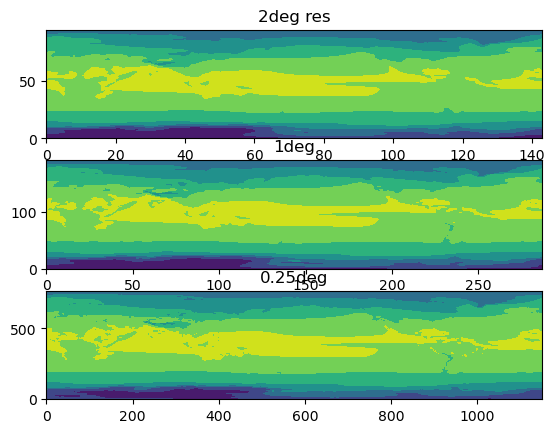

In [5]:
plt.subplot(3,1,1)
plt.contourf(ts1_ann)
plt.title('2deg res')
plt.subplot(3,1,2)
plt.contourf(ts2_ann)
plt.title('1deg')
plt.subplot(3,1,3)
plt.contourf(ts3_ann)
plt.title('0.25deg')

In [8]:
#Regrid
dstgrid = xr.Dataset({'lat': (['lat'], np.linspace(-90,90,181)),
                     'lon': (['lon'], np.linspace(0,359,360)),})
#-- regridder -- 
regridder1 = xe.Regridder(ts1_ann, dstgrid, 'bilinear', periodic= True)
regridder2 = xe.Regridder(ts2_ann, dstgrid, 'bilinear', periodic= True)
regridder3 = xe.Regridder(ts3_ann, dstgrid, 'bilinear', periodic= True)

ts1_reg = regridder1(ts1_ann)
ts2_reg = regridder2(ts2_ann)
ts3_reg = regridder3(ts3_ann)


In [11]:
lat = ts1_reg.lat
lon = ts1_reg.lon
tsANNset = xr.Dataset({'ts1_ann': xr.DataArray(ts1_reg[:,:],dims = ['lat','lon'],coords = {'lat': lat, 'lon': lon},),
                       'ts2_ann': xr.DataArray(ts2_reg[:,:],dims = ['lat','lon'],coords = {'lat': lat, 'lon': lon},),
                       'ts3_ann': xr.DataArray(ts3_reg[:,:],dims = ['lat','lon'],coords = {'lat': lat, 'lon': lon},),
                        },
    attrs = {'Global_attr': 'Created by PA 2024'}
    )
tsANNsetary = tsANNset.to_array()
tsANNset1=tsANNsetary.rename({'variable': 'exp'})

In [17]:
tsANNset1[0,:,:]

<xarray.DataArray (lat: 181, lon: 360)>
array([[222.43275, 222.46706, 222.4127 , ..., 222.43275, 222.43275,
        222.43275],
       [221.99269, 222.02084, 222.04913, ..., 222.16939, 222.11722,
        222.0549 ],
       [221.5932 , 221.62859, 221.66402, ..., 221.92776, 221.82747,
        221.71031],
       ...,
       [251.38507, 251.39972, 251.4142 , ..., 251.31836, 251.3385 ,
        251.36186],
       [251.26152, 251.27032, 251.2791 , ..., 251.22307, 251.23465,
        251.24811],
       [251.15578, 251.15578, 251.15578, ..., 251.15578, 251.15578,
        251.15578]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    exp      <U7 'ts1_ann'
Attributes:
    Global_attr:  Created by PA 2024

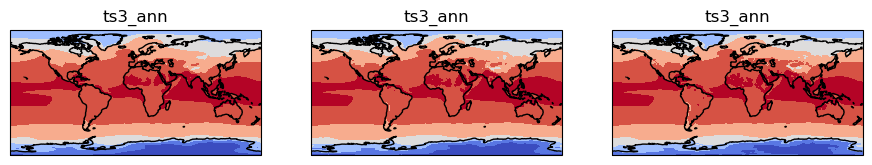

In [15]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
#for i,seas in enumerate(tsANNset1.exp):
for i in range(len(tsANNset1.exp)):

        # Add the cyclic point
        data,lons=add_cyclic_point(tsANNset1,coord=tsANNset1['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,tsANNset1.lat,data[i],
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

        # Title each subplot with the name of the model
        axs[i].set_title(seas.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()

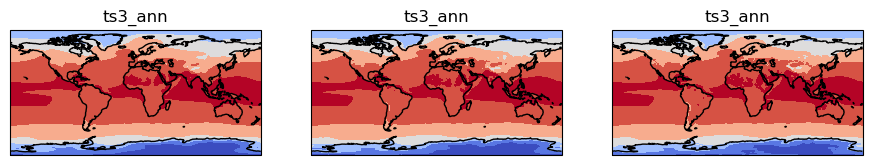

In [16]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5.5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
#for i,seas in enumerate(tsANNset1.exp):
for i in range(len(tsANNset1.exp)):

        # Contour plot
        cs=axs[i].contourf(tsANNset1.lon,tsANNset1.lat,tsANNset1[i],
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

        # Title each subplot with the name of the model
        axs[i].set_title(seas.values)

        # Draw the coastines for each subplot
        axs[i].coastlines()